- Are there regions that have more failing wells?
- Does water quality, a factor that contributes to well failure or need for repair?
- Is population size a factor affecting well failure or need for repair?
- Is there any difference in rates of failure or need for repair btwn ground surface and surface water wells?
- Does age of well indicate a likelihood of failure or need for repair?

In [15]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

In [16]:
df = pd.read_csv('../data/wells_data_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  float64
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   basin                  59400 non-null  object 
 9   region                 59400 non-null  object 
 10  lga                    59400 non-null  object 
 11  population             59400 non-null  int64  
 12  public_meeting         59400 non-null  bool   
 13  scheme_management      59400 non-null  object 
 14  permit                 59400 non-null  bool   
 15  co



======= Univariate Analysis =======


----- Categorical Features -----

Skipping date_recorded (too many unique values: 356)
Skipping funder (too many unique values: 1897)
Skipping installer (too many unique values: 1935)


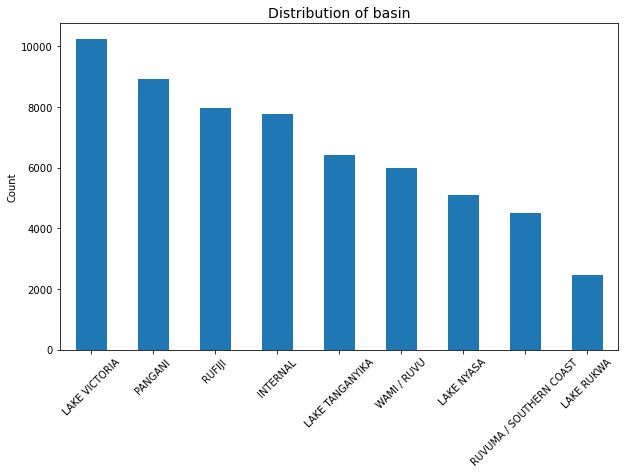

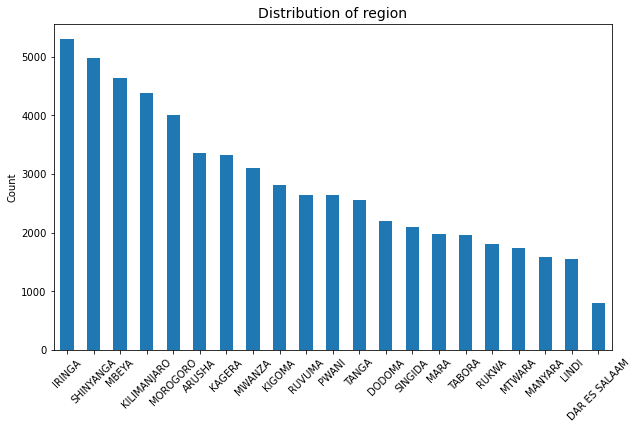

Skipping lga (too many unique values: 125)


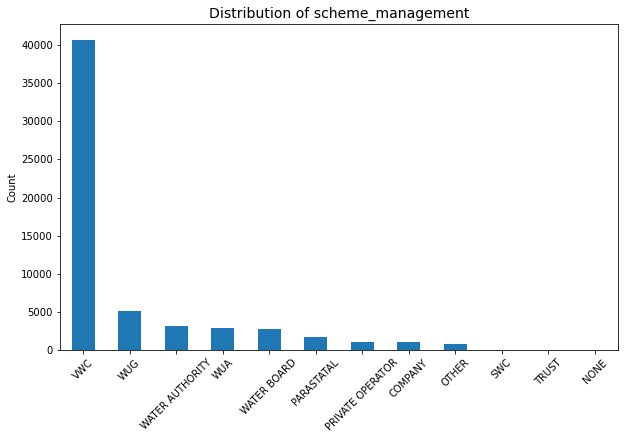

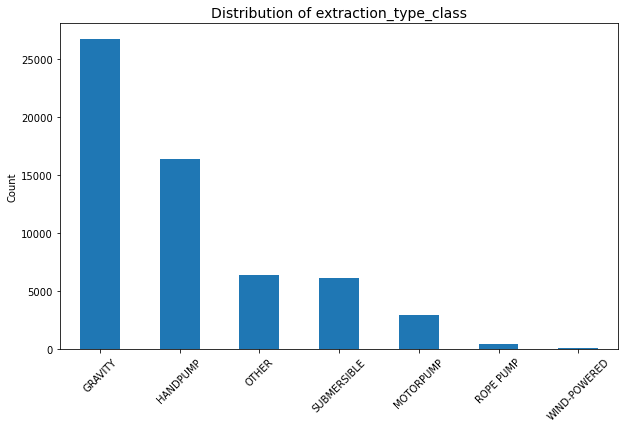

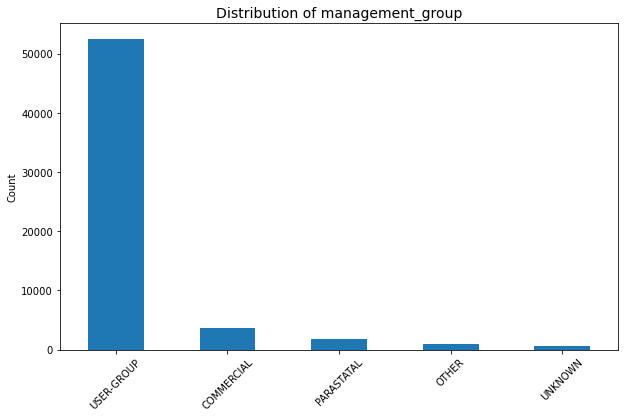

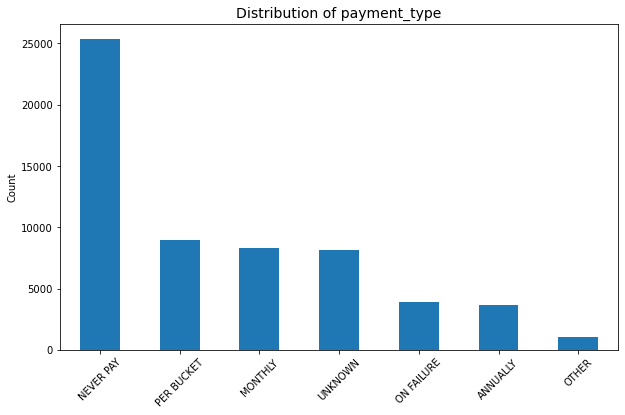

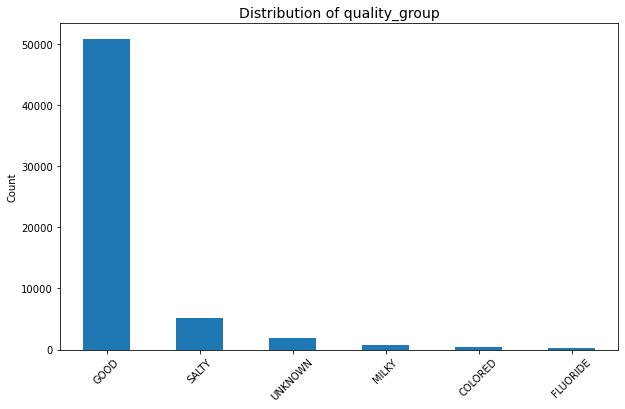

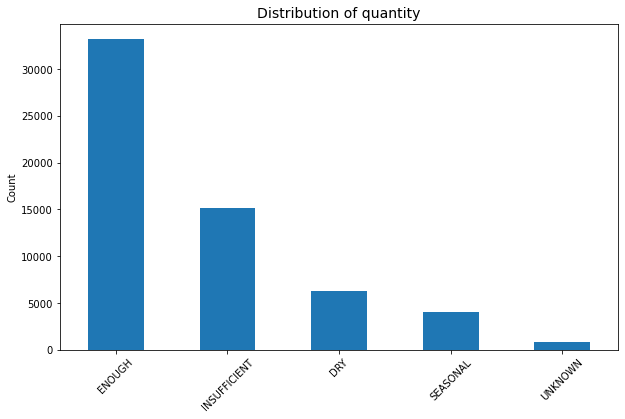

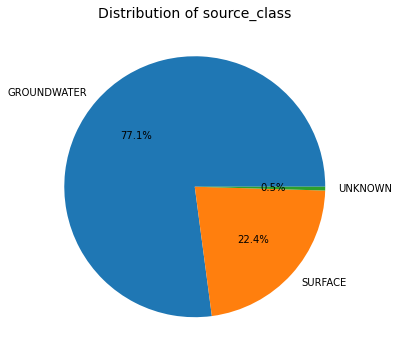

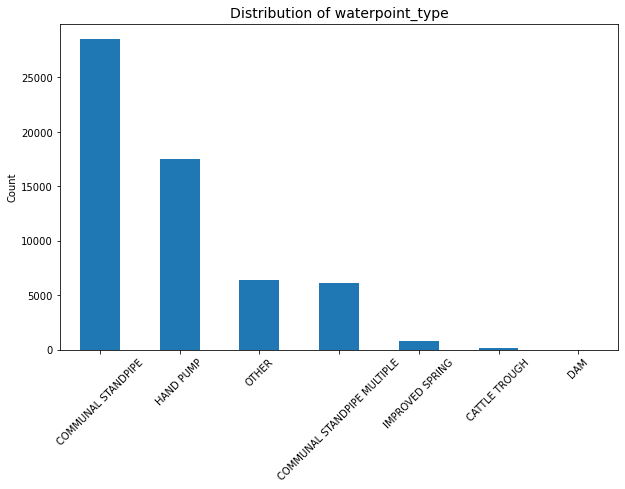

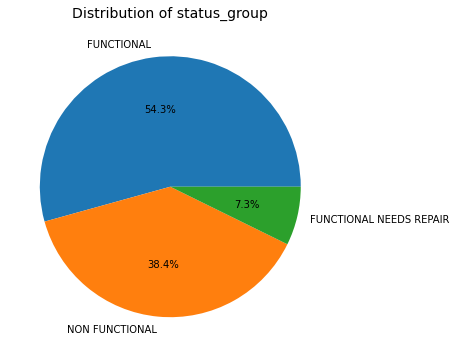


----- Numerical Features (amount_tsh, gps_height) -----



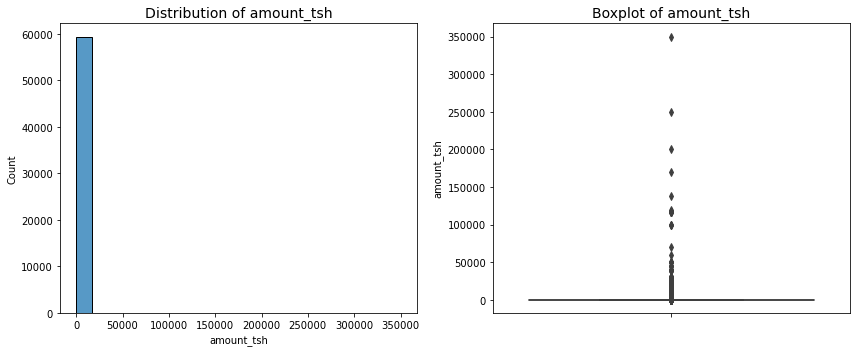

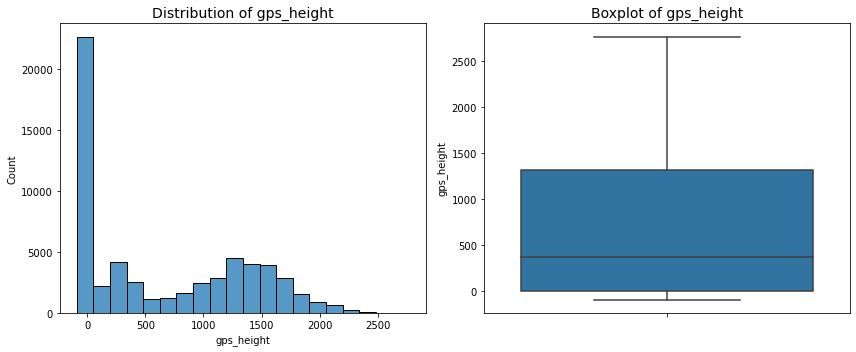



======= Bivariate Analysis (Correlation Matrix Heatmap) =======



<ipython-input-17-d77053b9859b>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[col] = self.df[col].astype('category').cat.codes


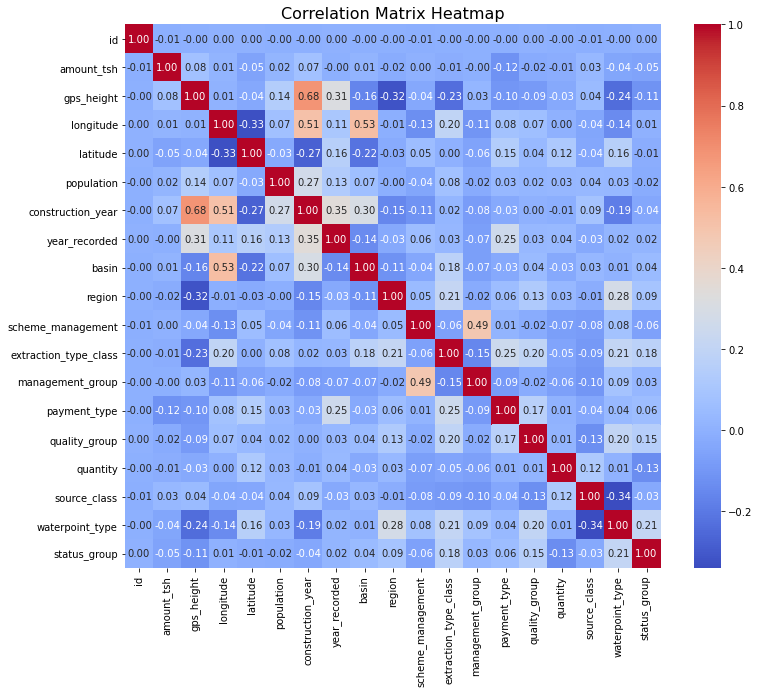



======= Multivariate Analysis (Geographical Distribution by Status) =======



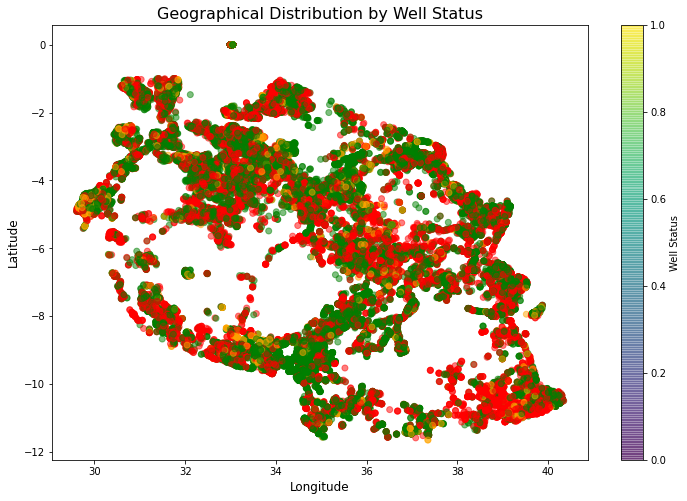

In [17]:

# Define the EDA class
class EDA: 
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path, low_memory=False)  # Optimize memory usage for large files
        self.target_variable = "status_group"

    def univariate_analysis(self):
        print("\n\n======= Univariate Analysis =======\n")

        categorical_cols = self.df.select_dtypes(include=['object']).columns
        numerical_cols = ['amount_tsh', 'gps_height']

        # Categorical Features
        print("\n----- Categorical Features -----\n")
        for col in categorical_cols:
            if self.df[col].nunique() <= 25:  # Limit to max 25 unique values for faster plotting
                if self.df[col].nunique() <= 3:
                    plt.figure(figsize=(6, 6))
                    self.df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
                else:
                    plt.figure(figsize=(10, 6))
                    self.df[col].value_counts().plot(kind='bar')
                
                plt.title(f'Distribution of {col}', fontsize=14)
                plt.ylabel('Count' if self.df[col].nunique() > 3 else '')
                plt.xticks(rotation=45)  # Rotate labels for better readability
                plt.show()
            else:
                print(f"Skipping {col} (too many unique values: {self.df[col].nunique()})")
                
        # Numerical Features
        print("\n----- Numerical Features (amount_tsh, gps_height) -----\n")
        for col in numerical_cols:
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            sns.histplot(self.df[col], bins=20)  # Use fewer bins for faster rendering
            plt.title(f'Distribution of {col}', fontsize=14)
            plt.subplot(1, 2, 2)
            sns.boxplot(y=self.df[col])
            plt.title(f'Boxplot of {col}', fontsize=14)
            plt.tight_layout()
            plt.show()
        
    def bivariate_analysis(self):
        """Performs bivariate analysis with a correlation matrix heatmap."""
        print("\n\n======= Bivariate Analysis (Correlation Matrix Heatmap) =======\n")

        # Select numerical and low-cardinality categorical columns
        df_corr = self.df.select_dtypes(include=['number'])
        for col in self.df.select_dtypes(include=['object']):
            if self.df[col].nunique() <= 25:
                df_corr[col] = self.df[col].astype('category').cat.codes

        # Correlation matrix and heatmap
        corr_matrix = df_corr.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Matrix Heatmap", fontsize=16)
        plt.show()    

    def multivariate_analysis(self):
        """Performs multivariate analysis with a heatmap based on latitude, longitude and status_group."""
        print("\n\n======= Multivariate Analysis (Geographical Distribution by Status) =======\n")

        plt.figure(figsize=(12, 8))

        # Define a custom colormap for the status_group
        status_colors = {"functional": "green", "non functional": "red", "functional needs repair": "orange"}

        # Normalize the case of the target variable values
        self.df[self.target_variable] = self.df[self.target_variable].str.lower()

        # Create scatterplot and color based on the status
        plt.scatter(
            self.df['longitude'], 
            self.df['latitude'], 
            c=self.df[self.target_variable].map(status_colors), 
            alpha=0.5
        )

        plt.title("Geographical Distribution by Well Status", fontsize=16)
        plt.xlabel("Longitude", fontsize=12)
        plt.ylabel("Latitude", fontsize=12)
        plt.colorbar(label="Well Status")
        plt.show()

# Example usage
eda = EDA("../data/wells_data_cleaned.csv")  # Replace with the actual path to your dataset
eda.univariate_analysis()
eda.bivariate_analysis()
eda.multivariate_analysis()


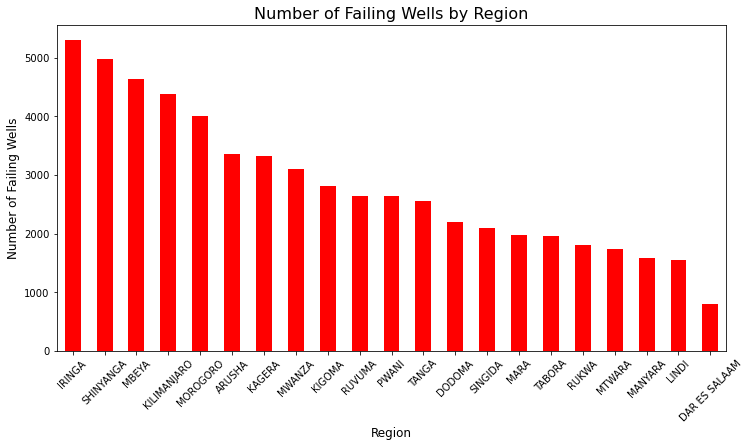

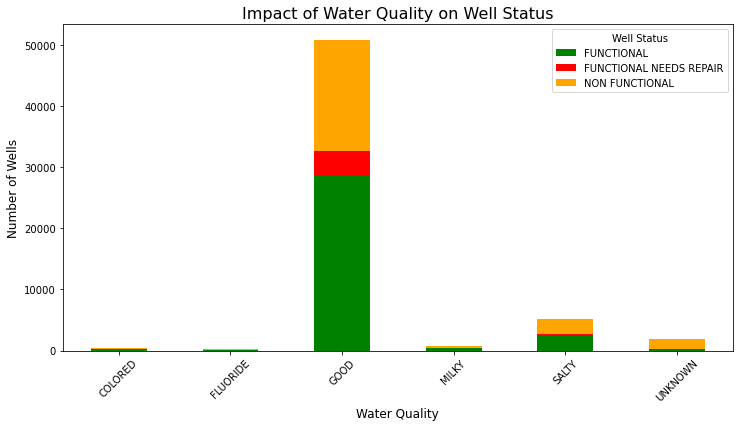

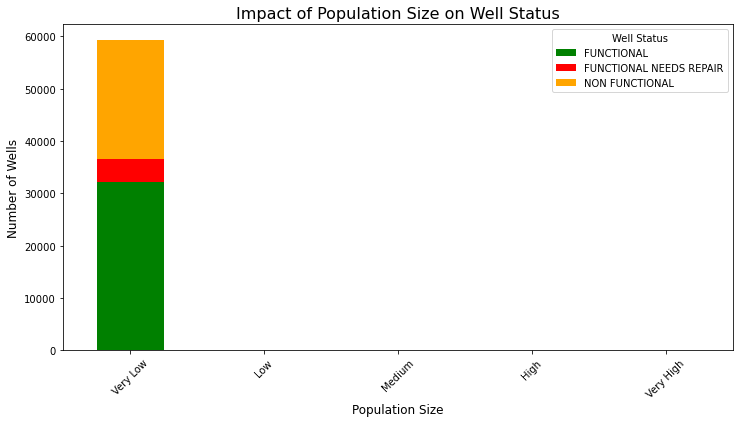

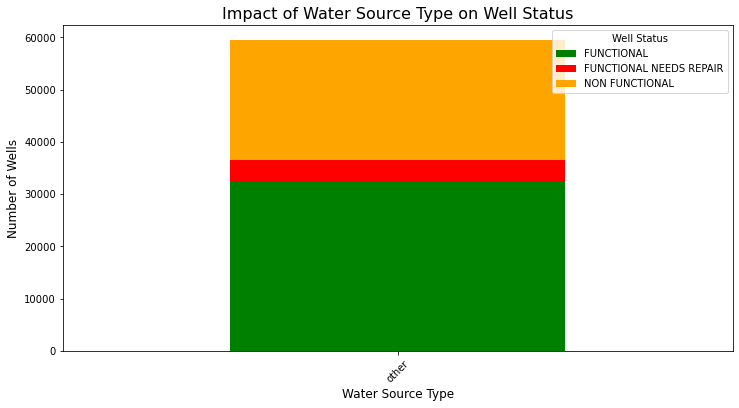

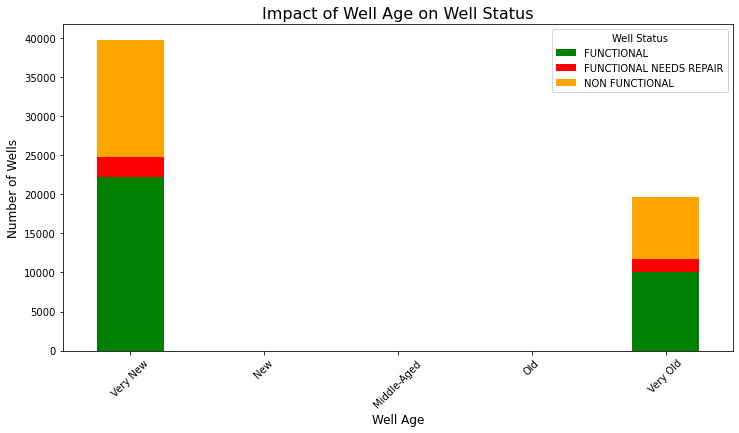

status_group,FUNCTIONAL,FUNCTIONAL NEEDS REPAIR,NON FUNCTIONAL
age_bins,,,
Very New,22235,2571,14914
New,0,0,0
Middle-Aged,0,0,0
Old,0,0,0
Very Old,10024,1746,7910


In [21]:

class TanzanianWellsAnalysis:
    def __init__(self, file_path):
        """
        Initialize the dataset for analysis.
        
        Parameters:
        file_path (str): Path to the dataset file.
        """
        self.df = pd.read_csv(file_path, low_memory=False)
        self.target_variable = "status_group"  # Assumes 'status_group' contains well status.

    def wells_by_region(self):
        """Analyzes regions with more failing wells."""
        failing_wells = self.df[self.df[self.target_variable] != "functional"]
        region_counts = failing_wells['region'].value_counts()

        plt.figure(figsize=(12, 6))
        region_counts.plot(kind='bar', color='red')
        plt.title("Number of Failing Wells by Region", fontsize=16)
        plt.xlabel("Region", fontsize=12)
        plt.ylabel("Number of Failing Wells", fontsize=12)
        plt.xticks(rotation=45)
        plt.show()

        return region_counts

    def water_quality_effect(self):
        """Analyzes whether water quality contributes to well failure or need for repair."""
        quality_vs_status = self.df.groupby(['quality_group', self.target_variable]).size().unstack()
        quality_vs_status.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red', 'orange'])
        plt.title("Impact of Water Quality on Well Status", fontsize=16)
        plt.xlabel("Water Quality", fontsize=12)
        plt.ylabel("Number of Wells", fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title="Well Status")
        plt.show()

        return quality_vs_status

    def population_effect(self):
        """Analyzes whether population size affects well failure or need for repair."""
        self.df['population_bins'] = pd.cut(self.df['population'], bins=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])
        pop_vs_status = self.df.groupby(['population_bins', self.target_variable]).size().unstack()
        pop_vs_status.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red', 'orange'])
        plt.title("Impact of Population Size on Well Status", fontsize=16)
        plt.xlabel("Population Size", fontsize=12)
        plt.ylabel("Number of Wells", fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title="Well Status")
        plt.show()

        return pop_vs_status

    def water_source_effect(self):
        """Analyzes difference in failure rates between ground surface and surface water wells."""
        surface_types = ["groundwater", "surface water"]
        self.df['water_source_type'] = self.df['source_class'].apply(lambda x: x if x in surface_types else "other")
        source_vs_status = self.df.groupby(['water_source_type', self.target_variable]).size().unstack()
        source_vs_status.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red', 'orange'])
        plt.title("Impact of Water Source Type on Well Status", fontsize=16)
        plt.xlabel("Water Source Type", fontsize=12)
        plt.ylabel("Number of Wells", fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title="Well Status")
        plt.show()

        return source_vs_status

    def well_age_effect(self):
        """Analyzes whether well age indicates a likelihood of failure or need for repair."""
        self.df['well_age'] = 2023 - self.df['construction_year']
        self.df['age_bins'] = pd.cut(self.df['well_age'], bins=5, labels=["Very New", "New", "Middle-Aged", "Old", "Very Old"])
        age_vs_status = self.df.groupby(['age_bins', self.target_variable]).size().unstack()
        age_vs_status.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red', 'orange'])
        plt.title("Impact of Well Age on Well Status", fontsize=16)
        plt.xlabel("Well Age", fontsize=12)
        plt.ylabel("Number of Wells", fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title="Well Status")
        plt.show()

        return age_vs_status

# Example usage:
analysis = TanzanianWellsAnalysis("../data/wells_data_cleaned.csv")
analysis.wells_by_region()
analysis.water_quality_effect()
analysis.population_effect()
analysis.water_source_effect()
analysis.well_age_effect()
